In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
from scipy.stats.mstats import gmean

Менеджер Маркетплейса СкайТакси попросил вас исследовать воронку Order 2 Ride - конверсию из созданного заказа в завершённую поездку за июль 2021 года.

1. Рассмотрите воронку по разным городам и тарифам (и кросс пересечения тоже). Какие выводы вы можете сделать?
2. Опишите, на какие последовательные конверсии можно было бы разложить O2R. Какой город показывает наибольшие конверсии-составляющие за весь период времени?
3. Выгрузите почасовой O2R в Иксель. Постройте цепной и базисный рост и прирост. Посчитайте средний рост и прирост (геометрическое надо считать для показателей роста, а для показателей прироста использовать среднее арифметическое, так как в нём могут быть отрицательные числа)
4. Выгрузите почасовой O2R по Эконому и по Комфорту в Иксель (отдельными векторами). Посчитайте по ним рост и прирост (цепной и базисный). Нарисуйте график с 4 линиями: цепной рост Эконома (А), цепной рост Комфорта (Б), сргеом(А) и сргеом(Б)

In [5]:
df = pd.read_csv('skytaxi_order_list.csv')
df.drop(['id_tariff.1', 'id_city.1'], inplace=True, axis=1)
df.head()

,id_order,id_driver,order_time,assign_time,arrive_to_client_time,order_finish_time,id_tariff,id_city,name_tariff,name_city
0,112774,2512.0,2021-07-31T10:27:34,NaN,NaN,NaN,NaN,111,NaN,Москва
1,113526,2843.0,2021-07-14T22:55:22,2021-07-14T22:57:22,2021-07-14T23:03:22,2021-07-14T23:21:22,1.0,111,Эконом,Москва
2,113418,660.0,2021-07-04T08:44:40,2021-07-04T08:47:40,NaN,NaN,1.0,111,Эконом,Москва
3,113203,1260.0,2021-07-29T22:33:27,2021-07-29T22:38:27,2021-07-29T22:48:27,2021-07-29T23:19:27,1.0,111,Эконом,Москва
4,113335,1977.0,2021-07-04T08:59:57,2021-07-04T09:05:57,2021-07-04T09:16:57,2021-07-04T10:32:57,1.0,111,Эконом,Москва


In [6]:
cols = ['order_time', 'assign_time', 'arrive_to_client_time', 'order_finish_time']

In [10]:
o2r_by_city = df[['id_order', 'id_city' , *cols]].groupby('id_city').count()

In [11]:
o2r_by_city.assign(o2r=lambda x: x.order_finish_time/x.id_order,
                   o2assign=lambda x: x.assign_time/x.id_order,
                   o2arrive=lambda x: x.arrive_to_client_time/x.id_order
)

,id_order,order_time,assign_time,arrive_to_client_time,order_finish_time,o2r,o2assign,o2arrive
id_city,,,,,,,,
111,1668,1668,1323,923,835,0.500600,0.793165,0.553357
112,628,628,542,391,356,0.566879,0.863057,0.622611
113,437,437,384,243,217,0.496568,0.878719,0.556064
114,376,376,331,232,206,0.547872,0.880319,0.617021
115,392,392,348,255,222,0.566327,0.887755,0.650510
116,423,423,364,243,221,0.522459,0.860520,0.574468
117,279,279,86,49,41,0.146953,0.308244,0.175627
118,351,351,242,154,135,0.384615,0.689459,0.438746
119,446,446,384,265,241,0.540359,0.860987,0.594170


Очевидный вывод: далеко не каждый совершённый заказ заканчивается, причиной тому в основном является то, что пользователи не дожидаются водителей. Дополнительные последовательные конверсии отражены в таблице выше

In [12]:
o2r_by_tariff = df[['id_order', 'id_tariff' , *cols]].groupby('id_tariff').count()
o2r_by_tariff.assign(o2r=lambda x: x.order_finish_time/x.id_order,
                   o2assign=lambda x: x.assign_time/x.id_order,
                   o2arrive=lambda x: x.arrive_to_client_time/x.id_order
)

,id_order,order_time,assign_time,arrive_to_client_time,order_finish_time,o2r,o2assign,o2arrive
id_tariff,,,,,,,,
1.0,2286,2286,2024,1490,1362,0.595801,0.885389,0.651794
10.0,1261,1261,988,694,605,0.479778,0.783505,0.550357
11.0,635,635,498,216,195,0.307087,0.784252,0.340157
65.0,582,582,297,210,176,0.302405,0.510309,0.360825
78.0,232,232,197,145,136,0.586207,0.849138,0.625000


In [37]:
o2r_cross = df[['id_order', 'name_city', 'name_tariff', *cols]].groupby(['name_city', 'name_tariff']).count()
o2r_cross = o2r_cross.assign(o2r=lambda x: x.order_finish_time/x.id_order,
                   o2assign=lambda x: x.assign_time/x.id_order,
                   o2arrive=lambda x: x.arrive_to_client_time/x.id_order
)
o2r_cross.sort_values(['o2r','o2assign', 'o2arrive'], inplace=True, ascending = False)
o2r_cross

,,id_order,order_time,assign_time,arrive_to_client_time,order_finish_time,o2r,o2assign,o2arrive
name_city,name_tariff,,,,,,,,
Казань,Люкс,1,1,1,1,1,1.000000,1.000000,1.000000
Красноярск,Люкс,1,1,1,1,1,1.000000,1.000000,1.000000
Тюмень,Люкс,1,1,1,1,1,1.000000,1.000000,1.000000
Санкт-Петербург,Эконом,201,201,194,149,141,0.701493,0.965174,0.741294
Казань,Эконом,203,203,196,153,140,0.689655,0.965517,0.753695
Екатеринбург,Эконом,211,211,204,155,145,0.687204,0.966825,0.734597
Москва,Эконом,647,647,636,466,430,0.664606,0.982998,0.720247
Краснодар,Эконом,216,216,208,158,136,0.629630,0.962963,0.731481
Москва,Люкс,127,127,114,81,79,0.622047,0.897638,0.637795


In [14]:
df[cols] = df[cols].apply(pd.to_datetime)
o2r_hour = df[['id_order', 'order_finish_time']].groupby(df['order_time'].dt.hour).count()
o2r_hour = o2r_hour.assign(o2r = lambda x: x.order_finish_time/x.id_order)
o2r_hour

,id_order,order_finish_time,o2r
order_time,,,
0,200,104,0.520000
1,189,91,0.481481
2,187,98,0.524064
3,229,118,0.515284
4,209,97,0.464115
5,213,105,0.492958
6,210,114,0.542857
7,206,100,0.485437
8,229,118,0.515284


$\left(1, \frac{X_{1}}{X_{0}}, \ldots, \frac{X_{n}}{X_{0}}\right)$ - базисный рост\
$\left(0, \frac{X_{1}-X_{0}}{X_{0}}, \ldots, \frac{X_{n}-X_{n-1}}{X_{0}}\right)$ - базисный прирост

In [15]:
basal_growth = [o2r_hour.o2r[i+1]/o2r_hour.o2r[0] for i in range(len(o2r_hour.o2r)-1)]
basal_increment = [(o2r_hour.o2r[i+1]-o2r_hour.o2r[i])/o2r_hour.o2r[0] for i in range(len(o2r_hour.o2r)-1)]
chain_growth = [o2r_hour.o2r[i+1]/o2r_hour.o2r[i] for i in range(len(o2r_hour.o2r)-1)]
chain_increment = [(o2r_hour.o2r[i+1]-o2r_hour.o2r[i])/o2r_hour.o2r[i] for i in range(len(o2r_hour.o2r)-1)]

In [16]:
geom_mean_chain_growth = gmean(chain_growth)
geom_mean_basal_growth = gmean(basal_growth)
geom_mean_chain_growth, geom_mean_basal_growth

(1.0011583160976483, 0.9491057522204207)

In [17]:
mean_chain_increment = np.mean(chain_increment)
mean_basal_increment = np.mean(basal_increment)
mean_chain_increment, mean_basal_increment

(0.004464135605563902, 0.0011731951181074755)

In [22]:
o2r_hour_comfort = df[df.name_tariff=='Комфорт'][['id_order', 'order_finish_time']].groupby(df['order_time'].dt.hour).count()
o2r_hour_comfort = o2r_hour_comfort.assign(o2r = lambda x: x.order_finish_time/x.id_order)
o2r_hour_comfort

,id_order,order_finish_time,o2r
order_time,,,
0,43,22,0.511628
1,51,27,0.529412
2,47,26,0.553191
3,60,29,0.483333
4,49,22,0.448980
5,45,20,0.444444
6,59,32,0.542373
7,50,29,0.580000
8,54,29,0.537037


In [23]:
o2r_hour_economy = df[df.name_tariff=='Эконом'][['id_order', 'order_finish_time']].groupby(df['order_time'].dt.hour).count()
o2r_hour_economy = o2r_hour_economy.assign(o2r = lambda x: x.order_finish_time/x.id_order)
o2r_hour_economy

,id_order,order_finish_time,o2r
order_time,,,
0,87,53,0.609195
1,94,51,0.542553
2,79,57,0.721519
3,106,69,0.650943
4,99,56,0.565657
5,98,67,0.683673
6,99,59,0.595960
7,90,46,0.511111
8,114,66,0.578947


In [31]:
chain_growth_comfort = [o2r_hour_comfort.o2r[i+1]/o2r_hour_comfort.o2r[i] for i in range(len(o2r_hour_comfort.o2r)-1)]
chain_growth_economy = [o2r_hour_economy.o2r[i+1]/o2r_hour_economy.o2r[i] for i in range(len(o2r_hour_economy.o2r)-1)]
cgc_geom = gmean(chain_growth_comfort)
cge_geom = gmean(chain_growth_economy)

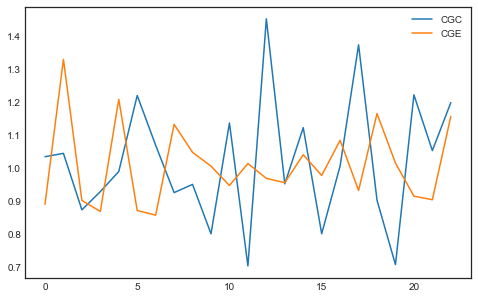

In [32]:
fig, ax = plt.subplots()
ax.plot(chain_growth_comfort, label='CGC')
ax.plot(chain_growth_economy, label='CGE')
ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()